# Título Principal: Exploración del Dataset (EDA)

## Parte 1: Introducción
En esta sección, se realizará un análisis exploratorio del dataset seleccionado.
El objetivo es comprender la estructura del dataset, incluyendo su tamaño, distribución de clases, dimensiones de las imágenes y cualquier preprocesamiento necesario.

## Parte 1.1: Descarga del Dataset
Primero, descargaremos el dataset utilizando la librería `kagglehub` y verificaremos la ubicación de los archivos.

In [6]:
import kagglehub

# Descargar la última versión del dataset
path = kagglehub.dataset_download("alexteboul/english-premier-league-logo-detection-20k-images")

print("Ruta a los archivos del dataset:", path)

Ruta a los archivos del dataset: C:\Users\esteban.aguilera-c\.cache\kagglehub\datasets\alexteboul\english-premier-league-logo-detection-20k-images\versions\4


## Parte 1.2: Carga y Exploración Inicial
En esta subsección, cargaremos el dataset y exploraremos su estructura básica, como el número de imágenes, clases disponibles y dimensiones de las imágenes.

In [8]:
from pathlib import Path

def inspect_dataset_dir(path: str, max_items: int = 20, max_examples: int = 10):
    p = Path(path)

    print(f"Ruta del dataset: {p}")
    print(f"Existe: {p.exists()} | Es directorio: {p.is_dir()}")
    if not p.exists() or not p.is_dir():
        return

    # Top-level: entradas, dirs, files
    entries = list(p.iterdir())
    dirs = sorted([x for x in entries if x.is_dir()], key=lambda x: x.name.lower())
    files = sorted([x for x in entries if x.is_file()], key=lambda x: x.name.lower())

    print(f"\n[Raíz] Entradas: {len(entries)} | Carpetas: {len(dirs)} | Archivos: {len(files)}")
    if dirs:
        print("Carpetas (muestra):", ", ".join(d.name for d in dirs[:max_items]))
    if files:
        print("Archivos (muestra):", ", ".join(f.name for f in files[:max_items]))

    # Búsqueda recursiva de imágenes
    exts = {".png", ".jpg", ".jpeg", ".webp", ".bmp"}
    imgs = [x for x in p.rglob("*") if x.is_file() and x.suffix.lower() in exts]

    print(f"\n[Imágenes] Total (recursivo): {len(imgs)}")
    if imgs:
        print("Ejemplos:", "\n  " + "\n  ".join(str(x) for x in imgs[:max_examples]))
    else:
        print("No se encontraron imágenes en ninguna subcarpeta.")

    # Sugerencia: subcarpeta con más imágenes (candidata)
    if dirs and not imgs:
        print("\nSugerencia: revisa subcarpetas (no se detectaron imágenes).")

    # Si hay imágenes, sugerir subcarpeta principal si no están en raíz
    if imgs and not any(f.suffix.lower() in exts for f in files):
        counts = []
        for d in dirs:
            c = sum(1 for x in d.rglob("*") if x.is_file() and x.suffix.lower() in exts)
            if c:
                counts.append((c, d))
        if counts:
            counts.sort(reverse=True, key=lambda t: t[0])
            c, d = counts[0]
            print(f"\nSubcarpeta candidata: {d} (contiene {c} imágenes)")

# USO
inspect_dataset_dir(path)

Ruta del dataset: C:\Users\esteban.aguilera-c\.cache\kagglehub\datasets\alexteboul\english-premier-league-logo-detection-20k-images\versions\4
Existe: True | Es directorio: True

[Raíz] Entradas: 2 | Carpetas: 1 | Archivos: 1
Carpetas (muestra): epl-logos-big
Archivos (muestra): train.csv

[Imágenes] Total (recursivo): 20000
Ejemplos: 
  C:\Users\esteban.aguilera-c\.cache\kagglehub\datasets\alexteboul\english-premier-league-logo-detection-20k-images\versions\4\epl-logos-big\epl-logos-big\arsenal\00451122-7e55-4388-a7f1-9c2ba87409c0.png
  C:\Users\esteban.aguilera-c\.cache\kagglehub\datasets\alexteboul\english-premier-league-logo-detection-20k-images\versions\4\epl-logos-big\epl-logos-big\arsenal\004fa685-48e5-40a0-9561-05c2f2db6d95.png
  C:\Users\esteban.aguilera-c\.cache\kagglehub\datasets\alexteboul\english-premier-league-logo-detection-20k-images\versions\4\epl-logos-big\epl-logos-big\arsenal\009abab7-5542-43d2-957c-b0d28aa33bff.png
  C:\Users\esteban.aguilera-c\.cache\kagglehub\dat

## Parte 1.3: Distribución de Clases
Aquí analizaremos la distribución de las clases en el dataset para asegurarnos de que esté balanceado.

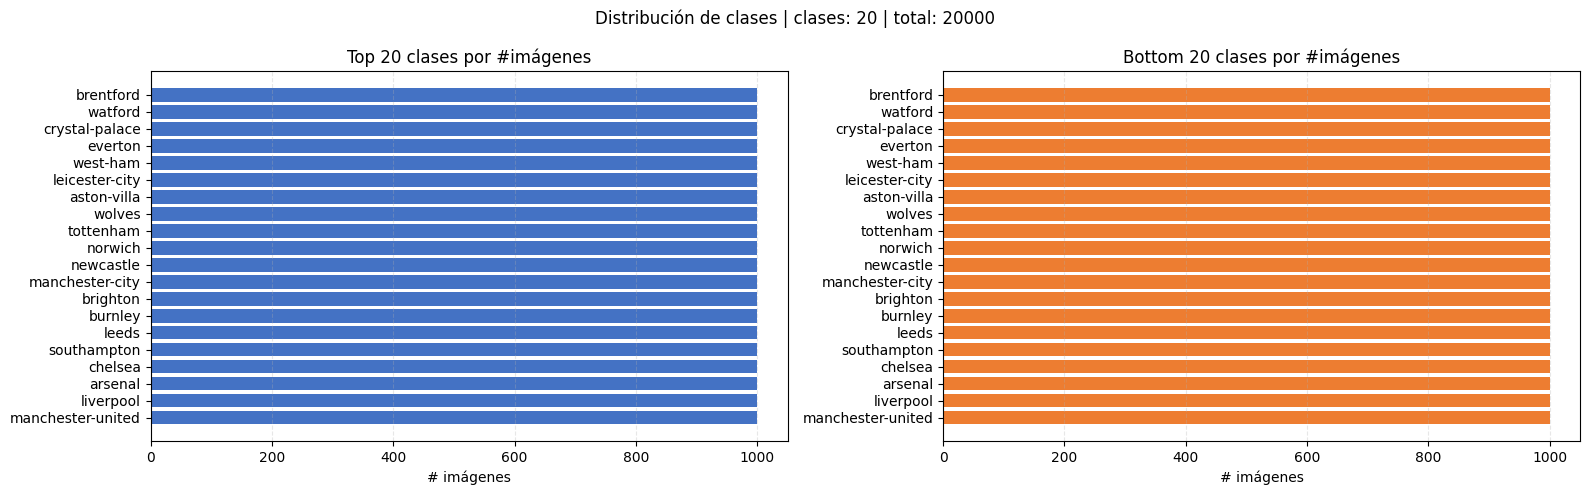

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_labels_13(df: pd.DataFrame, top_n: int = 20, label_col: str = "team_name"):
    vc = df[label_col].value_counts()
    n_classes = df[label_col].nunique()

    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    top = vc.head(top_n).sort_values(ascending=True)
    axes[0].barh(top.index, top.values, color="#4472C4")
    axes[0].set_title(f"Top {top_n} clases por #imágenes")
    axes[0].set_xlabel("# imágenes")
    axes[0].grid(axis="x", linestyle="--", alpha=0.3)

    bottom = vc.tail(top_n).sort_values(ascending=True)
    axes[1].barh(bottom.index, bottom.values, color="#ED7D31")
    axes[1].set_title(f"Bottom {top_n} clases por #imágenes")
    axes[1].set_xlabel("# imágenes")
    axes[1].grid(axis="x", linestyle="--", alpha=0.3)

    plt.suptitle(f"Distribución de clases | clases: {n_classes} | total: {len(df)}")
    plt.tight_layout()
    plt.show()

# USO
plot_labels_13(labels_df, top_n=20)

#### **1.4 – Dimensiones y canales de imágenes (muestreo)**

Muestra analizada: 500/500 | ilegibles: 0

Resumen tamaños:


,width,height
count,500.000000,500.000000
mean,135.128000,135.128000
std,10.625697,10.625697
min,112.000000,112.000000
25%,140.000000,140.000000
50%,140.000000,140.000000
75%,140.000000,140.000000
max,140.000000,140.000000



Canales (mode) conteo:


mode
RGBA    500
Name: count, dtype: int64

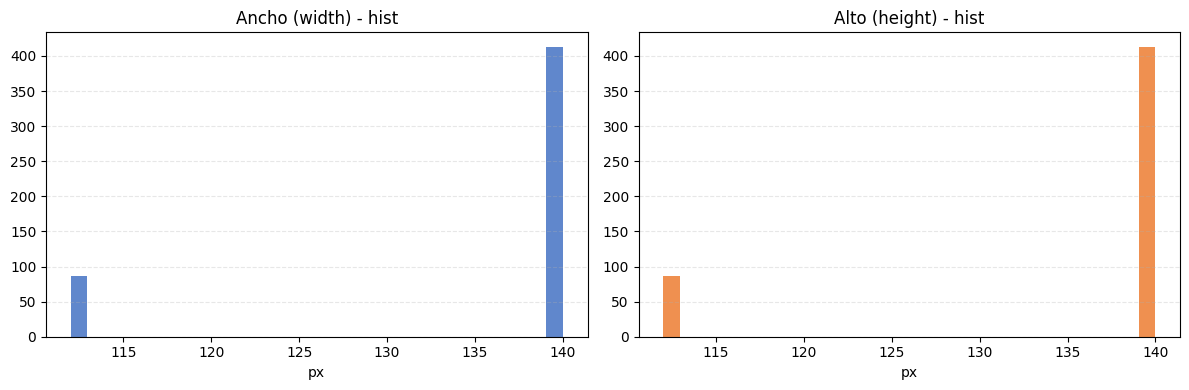

In [14]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

def inspect_images_14(df: pd.DataFrame, path_col: str = "local_path", sample_size: int = 500, seed: int = 42):
    df_ok = df[df[path_col].apply(lambda p: Path(p).exists())].copy()
    if df_ok.empty:
        print(f"No hay paths existentes en columna '{path_col}'.")
        return None

    sample_size = min(sample_size, len(df_ok))
    sample = df_ok.sample(sample_size, random_state=seed)

    widths, heights, modes = [], [], []
    bad = 0

    for p in sample[path_col]:
        try:
            with Image.open(p) as im:
                w, h = im.size
                widths.append(w)
                heights.append(h)
                modes.append(im.mode)  # 'RGB', 'RGBA', 'L', etc.
        except Exception:
            bad += 1

    meta = pd.DataFrame({"width": widths, "height": heights, "mode": modes})
    print(f"Muestra analizada: {len(meta)}/{sample_size} | ilegibles: {bad}")
    print("\nResumen tamaños:")
    display(meta[["width", "height"]].describe())
    print("\nCanales (mode) conteo:")
    display(meta["mode"].value_counts())

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes[0].hist(meta["width"], bins=30, color="#4472C4", alpha=0.85)
    axes[0].set_title("Ancho (width) - hist")
    axes[0].set_xlabel("px")
    axes[0].grid(axis="y", linestyle="--", alpha=0.3)

    axes[1].hist(meta["height"], bins=30, color="#ED7D31", alpha=0.85)
    axes[1].set_title("Alto (height) - hist")
    axes[1].set_xlabel("px")
    axes[1].grid(axis="y", linestyle="--", alpha=0.3)

    plt.tight_layout()
    plt.show()
    return meta

# USO
meta_14 = inspect_images_14(labels_df, path_col="local_path", sample_size=500)

#### **1.5 – Ejemplos por clase**

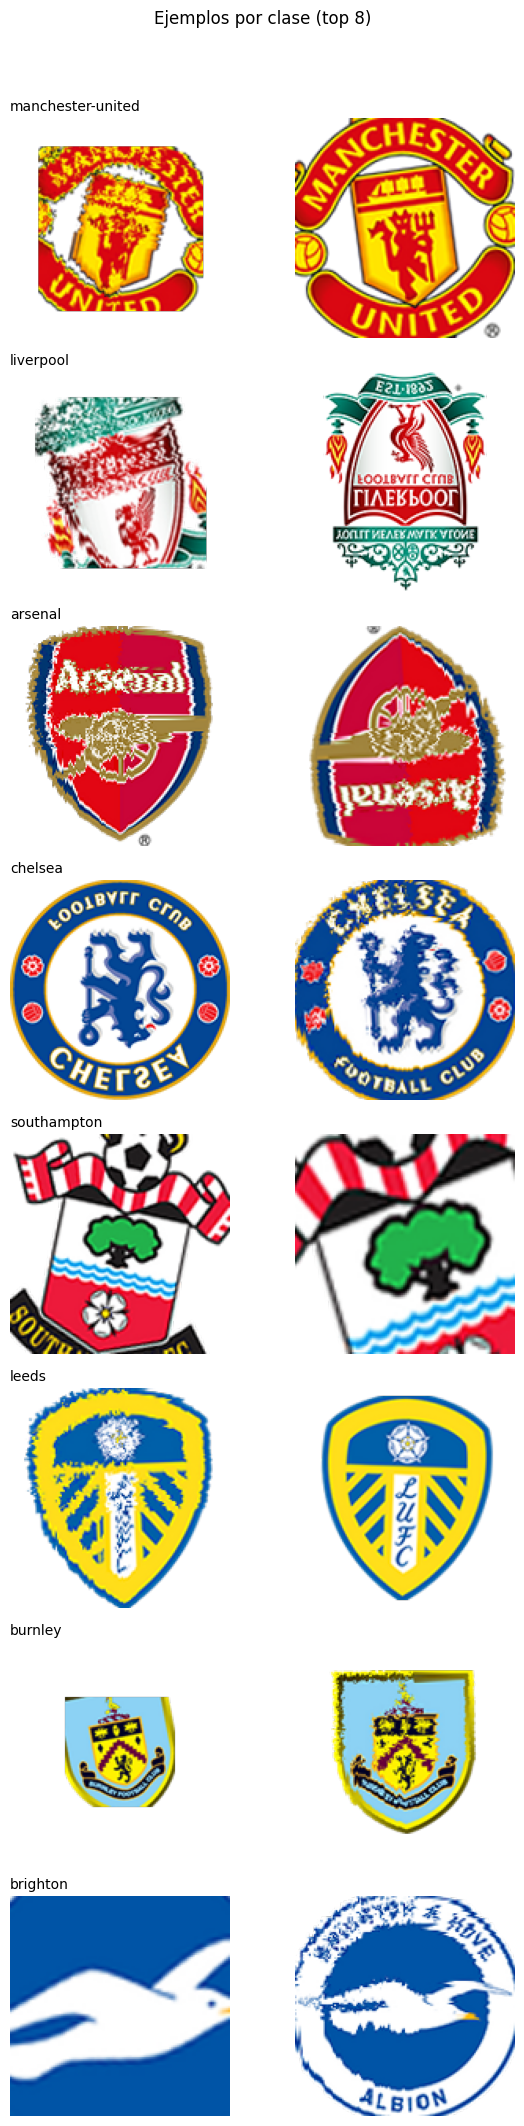

In [15]:
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path

def show_examples_15(df: pd.DataFrame, path_col: str = "local_path", label_col: str = "team_name",
                     classes_top_k: int = 8, examples_per_class: int = 2, seed: int = 42):
    df_ok = df[df[path_col].apply(lambda p: Path(p).exists())].copy()
    vc = df_ok[label_col].value_counts()
    classes = list(vc.head(classes_top_k).index)

    rows, cols = len(classes), examples_per_class
    fig, axes = plt.subplots(rows, cols, figsize=(3.2 * cols, 2.6 * rows))
    if rows == 1 and cols == 1:
        axes = [[axes]]
    elif rows == 1:
        axes = [axes]
    elif cols == 1:
        axes = [[ax] for ax in axes]

    for r, cls in enumerate(classes):
        sub = df_ok[df_ok[label_col] == cls].sample(min(examples_per_class, (df_ok[label_col] == cls).sum()),
                                                    random_state=seed)
        sub = sub.reset_index(drop=True)

        for c in range(cols):
            ax = axes[r][c]
            ax.axis("off")

            if c < len(sub):
                img_path = sub.loc[c, path_col]
                with Image.open(img_path) as im:
                    ax.imshow(im)
                title = f"{cls}"
                if c == 0:
                    ax.set_title(title, loc="left", fontsize=10)
            else:
                if c == 0:
                    ax.set_title(f"{cls} (sin más ejemplos)", loc="left", fontsize=10)

    plt.suptitle(f"Ejemplos por clase (top {classes_top_k})", y=1.02)
    plt.tight_layout()
    plt.show()

# USO
show_examples_15(labels_df, classes_top_k=8, examples_per_class=2)

#### **1.6 – Recomendaciones de preprocesamiento**

In [16]:
def preprocessing_notes_16(meta: pd.DataFrame | None):
    print("Preprocessing recomendado (conciso):")
    print("1) Convertir a RGB (algunas imágenes pueden venir RGBA).")
    print("2) Resize a tamaño fijo para el modelo (ej: 224x224 o 256x256).")
    print("3) Normalización:")
    print("   - Opción A (simple): pixels / 255.0")
    print("   - Opción B (ImageNet, si usas transfer learning): mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]")
    print("4) Data augmentation (train): random crop/resize, horizontal flip (si aplica), color jitter leve.")
    print("5) Split estratificado por clase (para no desbalancear train/val).")

    if meta is not None and "mode" in meta.columns:
        print("\nNota por canales (mode):")
        display(meta["mode"].value_counts())

# USO
preprocessing_notes_16(meta_14)

Preprocessing recomendado (conciso):
1) Convertir a RGB (algunas imágenes pueden venir RGBA).
2) Resize a tamaño fijo para el modelo (ej: 224x224 o 256x256).
3) Normalización:
   - Opción A (simple): pixels / 255.0
   - Opción B (ImageNet, si usas transfer learning): mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]
4) Data augmentation (train): random crop/resize, horizontal flip (si aplica), color jitter leve.
5) Split estratificado por clase (para no desbalancear train/val).

Nota por canales (mode):


mode
RGBA    500
Name: count, dtype: int64

## 1.7 Conclusiones (EDA)

- **Estructura del dataset:** El dataset contiene **20,000 imágenes**. Las imágenes están organizadas en subcarpetas dentro de `epl-logos-big/...` y las etiquetas vienen en `train.csv`.
- **Etiquetas / clases:** `train.csv` incluye `team_name` (nombre de equipo) y `team` (id). La distribución por clase puede ser **desbalanceada**, por lo que conviene usar **split estratificado** y monitorear métricas por clase (no solo accuracy).
- **Rutas del CSV:** La columna `filepath` está en formato estilo Kaggle (`../input/...`), por lo que se resolvió a ruta local mediante una columna `local_path` para poder cargar imágenes desde Windows.
- **Dimensiones y canales:** Las imágenes presentan variación en **ancho/alto** (según el muestreo). También puede haber variación de canales (p.ej. `RGB` vs `RGBA`), por lo que es recomendable **unificar a RGB**.
- **Preprocesamiento recomendado:** 
  1) Conversión a **RGB**, 2) **resize** a tamaño fijo (ej: 224×224 / 256×256), 3) **normalización** (0–1 o stats ImageNet si hay transfer learning), 4) augmentations suaves para robustez (train).
- **Siguiente paso:** Definir pipeline de carga (Dataset/Dataloader), split estratificado y baseline de clasificación para establecer métricas iniciales.

In [17]:
from pathlib import Path
import pandas as pd

def eda_summary_17(labels_df: pd.DataFrame,
                   meta_14: pd.DataFrame | None = None,
                   label_col: str = "team_name",
                   id_col: str = "team",
                   path_col: str = "local_path",
                   top_n: int = 5):
    print("=== Resumen EDA (1.7) ===")

    # Tamaño dataset
    print(f"Total filas (CSV): {len(labels_df)}")

    # Paths existentes
    if path_col in labels_df.columns:
        exists = labels_df[path_col].apply(lambda p: Path(p).exists())
        print(f"Paths existentes: {int(exists.sum())}/{len(labels_df)} ({exists.mean():.2%})")

    # Clases
    if label_col in labels_df.columns:
        n_classes = labels_df[label_col].nunique()
        vc = labels_df[label_col].value_counts()
        print(f"\nClases únicas ({label_col}): {n_classes}")
        print(f"Promedio imgs/clase: {vc.mean():.1f} | min: {vc.min()} | max: {vc.max()}")
        print(f"\nTop {top_n} clases:")
        display(vc.head(top_n))
        print(f"\nBottom {top_n} clases:")
        display(vc.tail(top_n))

    # Consistencia name -> id
    if {label_col, id_col}.issubset(labels_df.columns):
        mapping = labels_df.groupby(label_col)[id_col].nunique()
        bad = mapping[mapping > 1]
        print(f"\nConsistencia {label_col} -> {id_col}: problemas={len(bad)}")
        if len(bad):
            display(bad.sort_values(ascending=False).head(10))

    # Metadatos imagen (si existen)
    if meta_14 is not None and not meta_14.empty:
        print("\nImagenes (muestra) - tamaños:")
        display(meta_14[["width", "height"]].describe())
        if "mode" in meta_14.columns:
            print("\nCanales (mode) - conteo:")
            display(meta_14["mode"].value_counts())

# USO
eda_summary_17(labels_df, meta_14=meta_14)

=== Resumen EDA (1.7) ===
Total filas (CSV): 20000
Paths existentes: 20000/20000 (100.00%)

Clases únicas (team_name): 20
Promedio imgs/clase: 1000.0 | min: 1000 | max: 1000

Top 5 clases:


team_name
manchester-united    1000
liverpool            1000
arsenal              1000
chelsea              1000
southampton          1000
Name: count, dtype: int64


Bottom 5 clases:


team_name
west-ham          1000
everton           1000
crystal-palace    1000
watford           1000
brentford         1000
Name: count, dtype: int64


Consistencia team_name -> team: problemas=0

Imagenes (muestra) - tamaños:


,width,height
count,500.000000,500.000000
mean,135.128000,135.128000
std,10.625697,10.625697
min,112.000000,112.000000
25%,140.000000,140.000000
50%,140.000000,140.000000
75%,140.000000,140.000000
max,140.000000,140.000000



Canales (mode) - conteo:


mode
RGBA    500
Name: count, dtype: int64